# Feasibility Studies for Smartwatch

We're interested in a few things, but I'll probably hash them out properly later

### Response Rate
How often a participant entered a "No response", per day of the study

In [5]:
"""
Find "No response" rate per user per day of the study

"""
import pandas as pd
import numpy as np
from typing import Union

from ema import clean

meal_info = clean.cleaned_smartwatch(remove_catchups=True)


def fraction(positive: pd.Series, negative: pd.Series) -> float:
    """
    Given two series of positive and negative responses, find the fraction of positive responses

    """
    return len(positive) / (len(positive) + len(negative))


def fraction_per_day(meal_df: pd.DataFrame, label: Union[str, list]) -> tuple:
    """
    Get the fraction per day and its error for a specified type of meal_type

    """
    if isinstance(label, str):
        label = [label]

    all_labels = ["Meal", "Snack", "Drink", "No food/drink", "No response"]
    for l in label:
        assert l in all_labels, l

    # Iterate over days, slicing per day and finding the fraction of responses
    fractions, errors = [], []

    for day in range(1, 8):
        mask = (meal_df["delta"] > pd.Timedelta(days=day)) & (
            meal_df["delta"] < pd.Timedelta(days=day + 1)
        )
        meals_on_this_day = meal_df[mask]
        positive = meals_on_this_day[meals_on_this_day["meal_type"].isin(label)]
        negative = meals_on_this_day[
            meals_on_this_day["meal_type"].isin(
                [l for l in all_labels if l not in label]
            )
        ]
        fractions.append(fraction(positive, negative))

    return np.array(fractions), np.array(errors)

/tmp/ipykernel_5452/3049942635.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels([f"Day {i}" for i in range(8)])


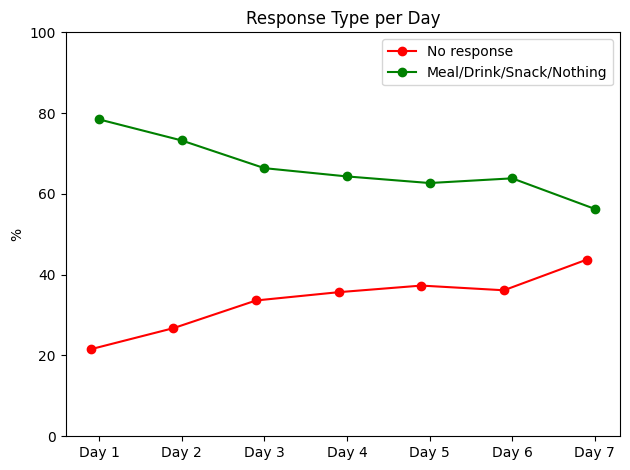

In [6]:
"""
Plot them

"""
import matplotlib.pyplot as plt


def plot(
    axis: plt.Axes, fractions: np.ndarray, errs: np.ndarray, x_ticks, **plot_kw
) -> None:
    """
    Plot the specified fractions and errors on the provided axis

    """
    axis.errorbar(
        x_ticks,
        100 * fractions,
        # yerr=100 * errs,
        fmt="-o",
        **plot_kw,
    )


fig, axis = plt.subplots()

plot(
    axis,
    *fraction_per_day(meal_info, "No response"),
    np.arange(1, 8) - 0.1,
    label="No response",
    color="r",
)
plot(
    axis,
    *fraction_per_day(meal_info, ["Meal", "Drink", "Snack", "No food/drink"]),
    np.arange(1, 8),
    label="Meal/Drink/Snack/Nothing",
    color="g",
)

axis.set_xticklabels([f"Day {i}" for i in range(8)])

axis.set_ylim(0, 100)
axis.set_title("Response Type per Day")
axis.set_ylabel("%")
axis.legend()

fig.tight_layout()
fig.savefig("img/response_types.png")

/tmp/ipykernel_5452/1922352142.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels([f"Day {i}" for i in range(8)])


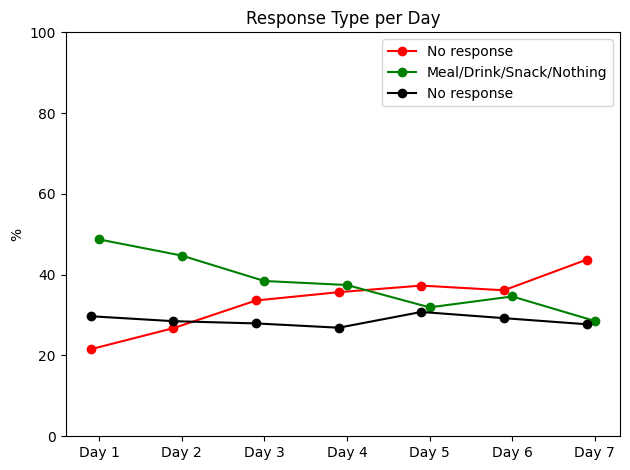

In [7]:
fig, axis = plt.subplots()

plot(
    axis,
    *fraction_per_day(meal_info, "No response"),
    np.arange(1, 8) - 0.1,
    label="No response",
    color="r",
)
plot(
    axis,
    *fraction_per_day(meal_info, ["Meal", "Drink", "Snack"]),
    np.arange(1, 8),
    label="Meal/Drink/Snack/Nothing",
    color="g",
)
plot(
    axis,
    *fraction_per_day(meal_info, "No food/drink"),
    np.arange(1, 8) - 0.1,
    label="No response",
    color="k",
)

axis.set_xticklabels([f"Day {i}" for i in range(8)])

axis.set_ylim(0, 100)
axis.set_title("Response Type per Day")
axis.set_ylabel("%")
axis.legend()

fig.tight_layout()
fig.savefig("img/three_response_types.png")

/tmp/ipykernel_5452/4036846043.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels([f"Day {i}" for i in range(8)])


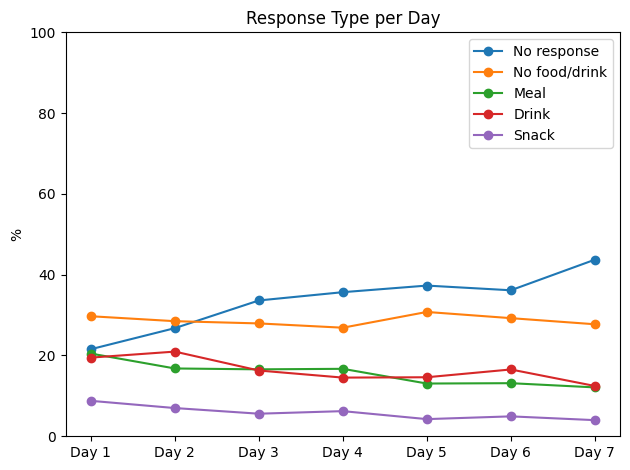

In [8]:
fig, axis = plt.subplots()

for label, colour in zip(
    ["No response", "No food/drink", "Meal", "Drink", "Snack"],
    ["r", "k", "b", "g", "o"],
):
    plot(
        axis,
        *fraction_per_day(meal_info, label),
        np.arange(1, 8),
        label=label,
    )

axis.set_xticklabels([f"Day {i}" for i in range(8)])

axis.set_ylim(0, 100)
axis.set_title("Response Type per Day")
axis.set_ylabel("%")
axis.legend()

fig.tight_layout()
fig.savefig("img/all_response_types.png")